# Titanic Classification Lab
<p> by Sarah, Laura, Grady </p>

In [2]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
df = pd.read_csv("titanic-train.csv")

In [4]:
df

,Unnamed: 0,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Embarked,PassengerId
0,1302,1,1,"Earnshaw, Mrs. Boulton (Olive Potter)",female,...,1,11767,83.1583,C,1302
1,17,0,3,"van Billiard, Master. Walter John",male,...,1,A/5. 851,14.5000,S,17
2,1049,1,1,"Frauenthal, Dr. Henry William",male,...,0,PC 17611,133.6500,S,1049
3,388,1,3,"Stranden, Mr. Juho",male,...,0,STON/O 2. 3101288,7.9250,S,388
4,1060,1,2,"Davis, Miss. Mary",female,...,0,237668,13.0000,S,1060
...,...,...,...,...,...,...,...,...,...,...,...
868,382,0,3,"Rice, Master. George Hugh",male,...,1,382652,29.1250,Q,382
869,529,0,1,"Smart, Mr. John Montgomery",male,...,0,113792,26.5500,S,529
870,1215,1,1,"Stengel, Mrs. Charles Emil Henry (Annie May Mo...",female,...,0,11778,55.4417,C,1215
871,923,1,2,"Brown, Miss. Edith Eileen",female,...,2,29750,39.0000,S,923


In [5]:
df.shape

(873, 12)

In [6]:
df.columns

Index([u'Unnamed: 0', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Embarked', u'PassengerId'],
      dtype='object')

In [7]:
df.isnull().sum()

Unnamed: 0     0
Survived       0
Pclass         0
Name           0
Sex            0
              ..
Parch          0
Ticket         0
Fare           1
Embarked       2
PassengerId    0
dtype: int64

In [8]:
df = df.drop(['Unnamed: 0','Name','Ticket','PassengerId'], axis =1)

In [9]:
df['Female'] = df.Sex.apply(lambda x:1 if x =="female" else 0)

In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Female
0,1,1,female,23.0,0,1,83.1583,C,1
1,0,3,male,11.5,1,1,14.5000,S,0
2,1,1,male,50.0,2,0,133.6500,S,0
3,1,3,male,31.0,0,0,7.9250,S,0
4,1,2,female,28.0,0,0,13.0000,S,1


In [11]:
df = df.drop('Sex',axis=1)

In [12]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Female
0,1,1,23.0,0,1,83.1583,C,1
1,0,3,11.5,1,1,14.5000,S,0
2,1,1,50.0,2,0,133.6500,S,0
3,1,3,31.0,0,0,7.9250,S,0
4,1,2,28.0,0,0,13.0000,S,1
...,...,...,...,...,...,...,...,...
868,0,3,8.0,4,1,29.1250,Q,0
869,0,1,56.0,0,0,26.5500,S,0
870,1,1,43.0,1,0,55.4417,C,1
871,1,2,15.0,0,2,39.0000,S,1


In [13]:
df.Embarked.unique()

array(['C', 'S', 'Q', nan], dtype=object)

In [14]:
df.Embarked.value_counts()

S    618
C    172
Q     81
Name: Embarked, dtype: int64

In [16]:
embarked_df = pd.get_dummies(df.Embarked, prefix = 'embarked')

df = df.join(embarked_df)

In [17]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,...,Embarked,Female,embarked_C,embarked_Q,embarked_S
0,1,1,23.0,0,1,...,C,1,1,0,0
1,0,3,11.5,1,1,...,S,0,0,0,1
2,1,1,50.0,2,0,...,S,0,0,0,1
3,1,3,31.0,0,0,...,S,0,0,0,1
4,1,2,28.0,0,0,...,S,1,0,0,1


In [19]:
df.drop('Embarked', axis = 1, inplace = True)

In [51]:
df = df.dropna()

In [52]:
df.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Female        0
embarked_C    0
embarked_Q    0
embarked_S    0
dtype: int64

In [53]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Female,embarked_C,embarked_Q,embarked_S
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,0.420000,2.212857,29.516548,0.504286,0.432857,35.592214,0.384286,0.192857,0.044286,0.760000
std,0.493911,0.841761,14.218020,0.910114,0.825076,54.090130,0.486774,0.394824,0.205876,0.427389
min,0.000000,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700,0.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,1.000000,34.444800,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,76.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [56]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Female,embarked_C,embarked_Q,embarked_S
Survived,1.000000,-0.352978,-0.032466,-0.016740,0.132490,0.263771,0.529705,0.185605,-0.084696,-0.138526
Pclass,-0.352978,1.000000,-0.381900,0.072570,0.009278,-0.559301,-0.158018,-0.313097,0.127142,0.237641
Age,-0.032466,-0.381900,1.000000,-0.261718,-0.160440,0.139542,-0.076437,0.066965,0.007569,-0.075154
SibSp,-0.016740,0.072570,-0.261718,1.000000,0.358555,0.121756,0.136749,-0.044107,0.040979,0.024716
Parch,0.132490,0.009278,-0.160440,0.358555,1.000000,0.183361,0.272717,-0.001913,-0.028792,0.019149
Fare,0.263771,-0.559301,0.139542,0.121756,0.183361,1.000000,0.172763,0.313604,-0.063232,-0.264747
Female,0.529705,-0.158018,-0.076437,0.136749,0.272717,0.172763,1.000000,0.067898,0.029795,-0.085545
embarked_C,0.185605,-0.313097,0.066965,-0.044107,-0.001913,0.313604,0.067898,1.000000,-0.105223,-0.869849
embarked_Q,-0.084696,0.127142,0.007569,0.040979,-0.028792,-0.063232,0.029795,-0.105223,1.000000,-0.383062
embarked_S,-0.138526,0.237641,-0.075154,0.024716,0.019149,-0.264747,-0.085545,-0.869849,-0.383062,1.000000


In [65]:
color = df.Survived.map({0: 'red', 1: 'green'})

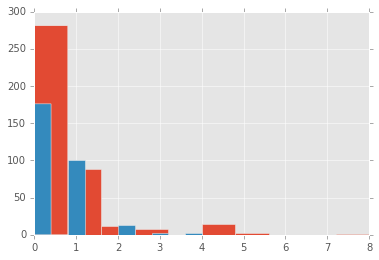

In [190]:
ax = df.groupby('Survived').SibSp.hist()

In [85]:
df.Survived.value_counts()

0    406
1    294
Name: Survived, dtype: int64

## Build Model

In [326]:
X = df[['Pclass',
 'Age',
 'SibSp',
 'Parch',
# 'Fare',
 'Female',
 'embarked_C',
 'embarked_Q',
 'embarked_S']]

In [327]:
c = df.Survived

In [328]:
from sklearn import preprocessing 

independent_variables = X.columns.tolist()

for variable in independent_variables:
    X[variable] = preprocessing.scale(np.log(X[variable] + 1))

/Users/skay/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [332]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

logit = LogisticRegression()

estimator = LogisticRegression()
selector = RFECV(estimator)
selector = selector.fit(X[independent_variables],df['Survived'])

support = pd.DataFrame(data = selector.support_, index = X[independent_variables].columns, 
             columns = ['support']).query("support == True")
support

,support
Pclass,True
Age,True
SibSp,True
Female,True


In [333]:
model = linear_model.LogisticRegression(penalty='l2').fit(X, c)

print model.coef_
print model.intercept_

[[ -8.66250491e-01  -4.38977016e-01  -3.44127670e-01   5.58374623e-02
    1.25339837e+00  -6.84091886e-04  -2.91666450e-01  -1.80907767e-01]]
[-0.42251627]


In [334]:
model.score(X,c)

0.78714285714285714

In [335]:
logit_hat = model.intercept_ + (X * model.coef_[0]).sum(axis = 1)

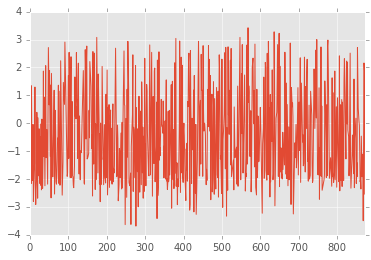

In [336]:
logit_hat.plot()

In [337]:
((logit_hat >= 0) == (c == 1)).sum()

551

In [338]:
((logit_hat >= 0) == (c == 1)).mean()

0.78714285714285714

In [339]:
odds_hat = np.exp(logit_hat)

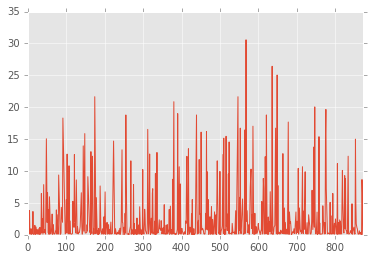

In [340]:
odds_hat.plot()

In [341]:
p_hat = odds_hat / (1 + odds_hat)

In [342]:
p_hat

0      0.960573
1      0.119417
2      0.221751
3      0.103008
4      0.792466
         ...   
868    0.029458
869    0.385455
870    0.896472
871    0.867150
872    0.073184
dtype: float64

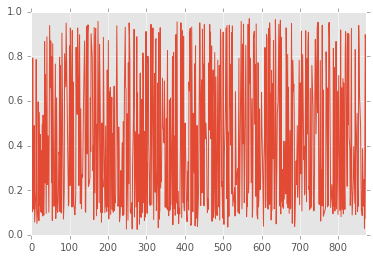

In [343]:
p_hat.plot()

In [344]:
c_hat = p_hat.round()

In [345]:
c_hat

0      1
1      0
2      0
3      0
4      1
      ..
868    0
869    0
870    1
871    1
872    0
dtype: float64

In [346]:
(c_hat == c).sum()

551

In [347]:
pd.crosstab(c_hat,
    c,
    rownames = ['Predicted'],
    colnames = ['Actual'])

Actual,0,1
Predicted,,
0,344,87
1,62,207


## Test Data

In [389]:
test_df = pd.read_csv("titanic-test.csv")

In [390]:
test_df.shape

(436, 11)

In [391]:
test_df = test_df.drop(['Unnamed: 0','Name','Ticket','PassengerId'], axis =1)

In [392]:
test_df['Female'] = test_df.Sex.apply(lambda x:1 if x =="female" else 0)

In [393]:
test_df = test_df.drop('Sex',axis=1)

In [394]:
embarked_test_df = pd.get_dummies(test_df.Embarked, prefix = 'embarked')

test_df = test_df.join(embarked_test_df)

In [395]:
test_df.drop('Embarked', axis = 1, inplace = True)

In [396]:
test_df.isnull().sum()

Pclass         0
Age           91
SibSp          0
Parch          0
Fare           0
Female         0
embarked_C     0
embarked_Q     0
embarked_S     0
dtype: int64

In [397]:
test_df = test_df.dropna()

In [398]:
test_df.shape

(345, 9)

In [404]:
test_X = test_df[['Pclass',
 'Age',
 'SibSp',
 'Parch',
# 'Fare',
 'Female',
 'embarked_C',
 'embarked_Q',
 'embarked_S']]

In [405]:
for variable in independent_variables:
    test_X[variable] = preprocessing.scale(np.log(test_X[variable] + 1))

/Users/skay/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [406]:
predicted_test = model.predict(test_X)

In [407]:
len(test_df)

345

In [408]:
len(predicted_test)

345

In [411]:
test_df['survival_prediction'] = predicted_test

In [416]:
test_df

,Pclass,Age,SibSp,Parch,Fare,Female,embarked_C,embarked_Q,embarked_S,survival_prediction
1,3,27,0,0,7.8958,0,0,0,1,0
2,2,24,2,0,31.5000,0,0,0,1,0
4,1,32,0,0,30.5000,0,1,0,0,1
5,2,51,0,0,12.5250,0,0,0,1,0
6,3,31,0,0,7.7333,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
431,3,29,0,0,7.9250,1,0,0,1,1
432,2,30,3,0,21.0000,1,0,0,1,1
433,1,50,0,1,247.5208,1,1,0,0,1
434,3,9,5,2,46.9000,0,0,0,1,0


In [419]:
test_df.to_csv("sarah_laura_grady_predictions.csv")